In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# set the plot style
mpl.style.use('ggplot')

In [2]:
VAE_1_to_5 = '../logdir/VAW_1t3_400_convs2t_0330-2050-39-2023/model_VAW_1t3_400_convs2t_epoch29.pkl'
# load the loss lists from the saved file
with open(VAE_1_to_5, 'rb') as f:
    conv_s2t_loss, KL_z_loss, Dis_loss = pickle.load(f)

# ! * 100 for this
conv_s2t_loss_0 = [i.cpu().data.numpy().astype(float) * 100 for i in conv_s2t_loss]
KL_z_loss_0 = [i.cpu().data.numpy().astype(float) for i in KL_z_loss]
Dis_loss_0 = [i.cpu().data.numpy().astype(float) for i in Dis_loss]

AttributeError: 'list' object has no attribute 'cpu'

NameError: name 'conv_s2t_loss_0' is not defined

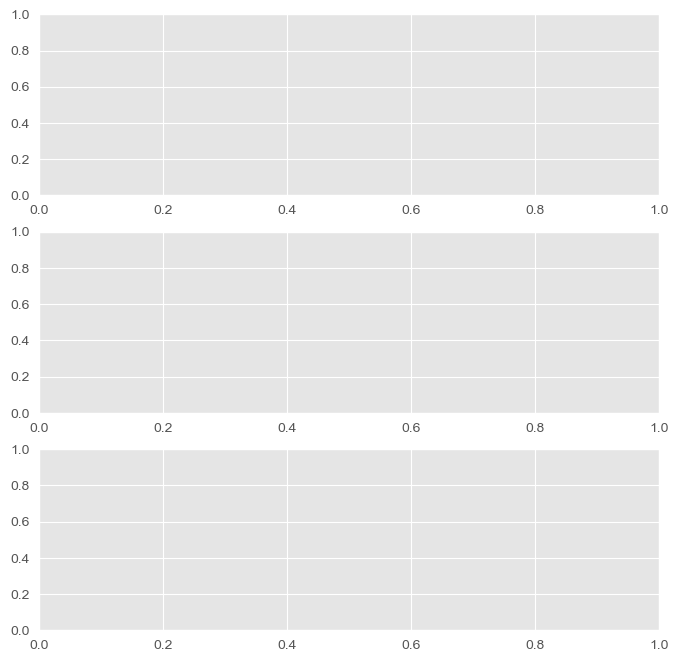

In [3]:
# plot the average losses in separate plots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# set the colors and line styles
colors = ['#0072B2', '#E69F00', '#009E73']
linestyles = ['-', '--', ':']

axs[0].plot(conv_s2t_loss_0, color=colors[0], linestyle=linestyles[0])
axs[0].set_title('conv_s2t loss', fontsize=14)
axs[0].set_xlabel('Iteration', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)

axs[1].plot(KL_z_loss_0, color=colors[1], linestyle=linestyles[1])
axs[1].set_title('Average KL(z) loss', fontsize=14)
axs[1].set_xlabel('Iteration', fontsize=12)
axs[1].set_ylabel('Loss', fontsize=12)

axs[2].plot(Dis_loss_0, color=colors[2], linestyle=linestyles[2])
axs[2].set_title('Average Dis loss', fontsize=14)
axs[2].set_xlabel('Iteration', fontsize=12)
axs[2].set_ylabel('Loss', fontsize=12)

plt.tight_layout()
plt.show()

In [11]:
def process(data):
    res = []
    for i in data:
        temp = i[0].cpu().data.numpy().astype(float)
        temp = temp.reshape((1,1))
        res.append(temp)
    res = np.concatenate(res)
    return res

def average_std(range_i):
    std = 0
    for i in range(range_i):
        # load the loss lists from the saved file
        file = f'../logdir/VAW_1t3_400_convs2t_0330-2050-39-2023/model_VAW_1t3_400_convs2t_epoch{i}.pkl'
        with open(file, 'rb') as f:
            conv_s2t_loss, KL_z_loss, Dis_loss = pickle.load(f)
        conv_s2t_loss = process(conv_s2t_loss)
        std += np.std(conv_s2t_loss)
    print(std/range_i)

VAW_1_to_5 = '../logdir/VAW_1t3_400_convs2t_0330-2050-39-2023/model_VAW_1t3_400_convs2t_epoch20.pkl'
# load the loss lists from the saved file
with open(VAW_1_to_5, 'rb') as f:
    conv_s2t_loss, KL_z_loss, Dis_loss = pickle.load(f)

conv_s2t_loss = process(conv_s2t_loss)
KL_z_loss = process(KL_z_loss)
Dis_loss = process(Dis_loss)

G_loss = conv_s2t_loss * 400 + Dis_loss
E_loss = conv_s2t_loss + KL_z_loss
D_loss = -0.01 * conv_s2t_loss


average_std(15)

0.5973251142961329


In [19]:
def process(data):
    res = []
    for i in data:
        temp = i[0].cpu().data.numpy().astype(float)
        temp = temp.reshape((1,1))
        res.append(temp)
    res = np.concatenate(res)
    return res

def average_loss(range_i):
    jwgan = []
    jobs = []
    jlat = []
    for i in range(range_i):
        # load the loss lists from the saved file
        file = f'../logdir/VAW_1t5_200_convs2t_0331-0327-58-2023/model_VAW_1t5_200_convs2t_epoch{i}.pkl'
        with open(file, 'rb') as f:
            conv_s2t_loss, KL_z_loss, Dis_loss = pickle.load(f)
        conv_s2t_loss = process(conv_s2t_loss)
        KL_z_loss = process(KL_z_loss)
        Dis_loss = process(Dis_loss)
        jwgan.append(np.average(conv_s2t_loss))
        jobs.append(np.average(KL_z_loss))
        jlat.append(np.average(Dis_loss))
    return jwgan, jobs, jlat

jwgan, jobs, jlat = average_loss(15)

In [5]:
def average_std_2(range_i):
    std = 0
    for i in range(range_i):
        # load the loss lists from the saved file
        file = f'../logdir/VAW_VAE_1_to_5_0330-0247-44-2023/model_VAW_VAE_1_to_5_epoch{i}.pkl'
        with open(file, 'rb') as f:
            conv_s2t_loss, KL_z_loss, Dis_loss,_,_,_ = pickle.load(f)
        conv_s2t_loss = process(conv_s2t_loss)
        std += np.std(conv_s2t_loss)
    print(std/range_i)


average_std_2(15)

0.659763498354095


In [6]:
alpha5000 = np.load('../conv_s2t_log_single-1-3.npy')
epoch= []
for i in range(25):
    target = i
    temp = []
    for j in alpha5000:
        e = int(j[0])
        if e == target + 1:
            temp.append(j[2])
    epoch.append([temp])

std = np.average([np.std(epoch[i]) for i in range(10, 25)])
std

0.5116720256060618

In [7]:
alpha20000 = np.load('../conv_s2t_log_test2-1-3.npy')
epoch= []
for i in range(25):
    target = i
    temp = []
    for j in alpha20000:
        e = int(j[0])
        if e == target + 1:
            temp.append(j[2])
    epoch.append([temp])

std = np.average([np.std(epoch[i]) for i in range(10, 25)])
std

0.3842733643709677

In [8]:
alpha50 = np.load('../conv_s2t_log_test-1-3.npy')
epoch= []
for i in range(25):
    target = i
    temp = []
    for j in alpha50:
        e = int(j[0])
        if e == target + 1:
            temp.append(j[2])
    epoch.append([temp])

std = np.average([np.std(epoch[i]) for i in range(10, 25)])
std

1.0092583424391717

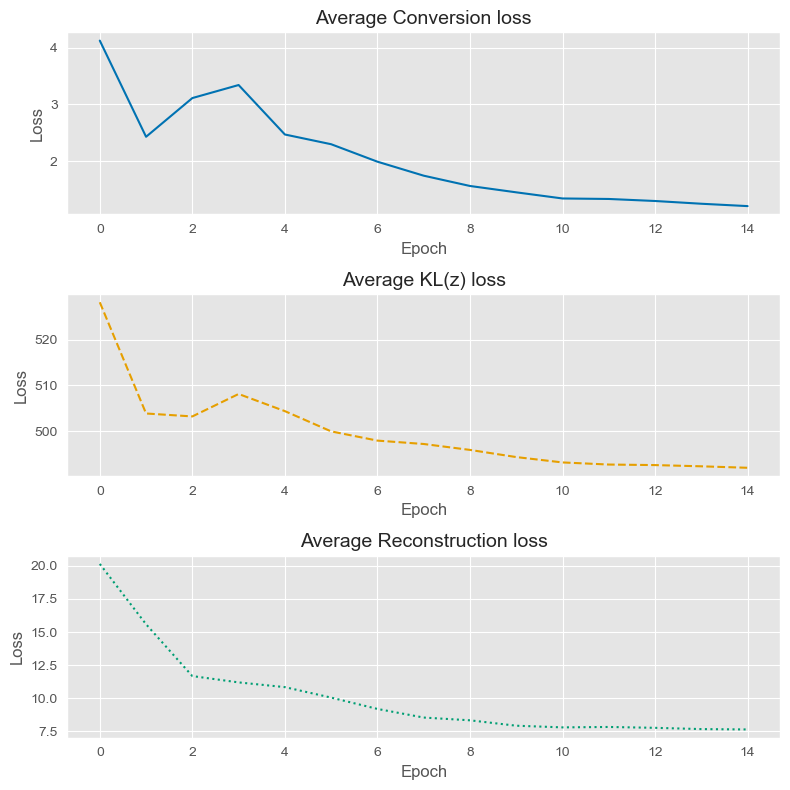

In [21]:
# plot the average losses in separate plots
_, axs = plt.subplots(3, 1, figsize=(8, 8))
# set the colors and line styles
colors = ['#0072B2', '#E69F00', '#009E73']
linestyles = ['-', '--', ':']

axs[0].plot(jwgan, color=colors[0], linestyle=linestyles[0])
axs[0].set_title('Average Conversion loss', fontsize=14)
axs[0].set_xlabel('Epoch', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)

axs[1].plot(jlat, color=colors[1], linestyle=linestyles[1])
axs[1].set_title('Average KL(z) loss', fontsize=14)
axs[1].set_xlabel('Epoch', fontsize=12)
axs[1].set_ylabel('Loss', fontsize=12)

axs[2].plot(jobs, color=colors[2], linestyle=linestyles[2])
axs[2].set_title('Average Reconstruction loss', fontsize=14)
axs[2].set_xlabel('Epoch', fontsize=12)
axs[2].set_ylabel('Loss', fontsize=12)

plt.tight_layout()
plt.show()